## Bitcoin Price Prediction Using LSTM with Pytorch 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [10]:
# Loading the data
data = pd.read_csv("Data/BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [11]:
# Convert the 'Timestamp' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
df = data[['Date','Close']]
df

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3484,2024-04-01,69702.148438
3485,2024-04-02,65446.972656
3486,2024-04-03,65980.812500
3487,2024-04-04,68508.843750


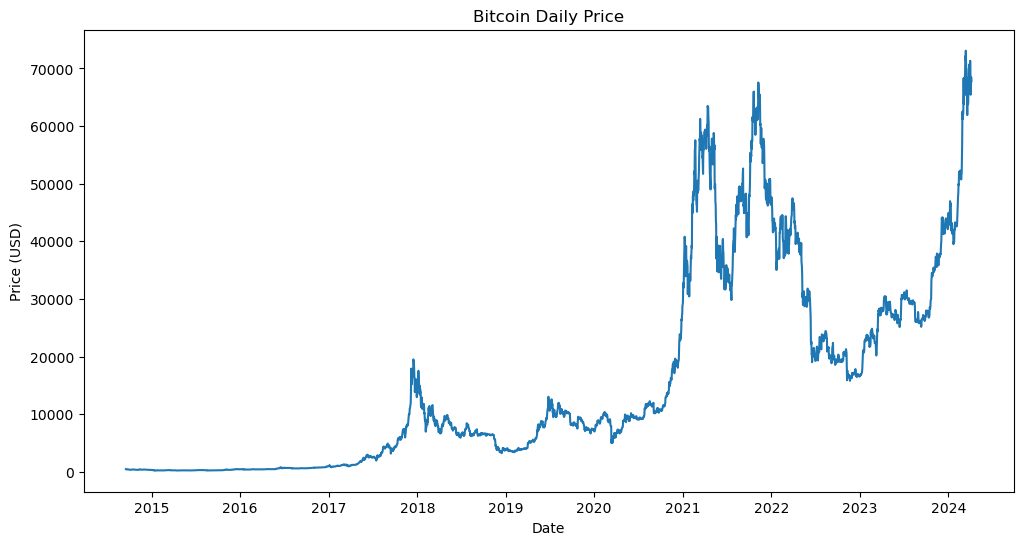

In [13]:
# Plotting

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"])
plt.title("Bitcoin Daily Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [14]:
from copy import deepcopy as dc

def prepare_df_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('Date', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 7
shifted_df = prepare_df_for_lstm(df, lookback)
shifted_df
    

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2014-09-24,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,377.181000,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014
...,...,...,...,...,...,...,...,...
2024-04-01,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125,69455.343750,69987.835938,69958.812500
2024-04-02,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125,69455.343750,69987.835938
2024-04-03,65980.812500,65446.972656,69702.148438,71333.648438,69645.304688,69892.828125,70744.953125,69455.343750


In [15]:
shifted_df_to_np = shifted_df.to_numpy()

shifted_df_to_np

array([[  423.204987,   435.790985,   402.152008, ...,   394.79599 ,
          424.440002,   457.334015],
       [  411.574005,   423.204987,   435.790985, ...,   408.903992,
          394.79599 ,   424.440002],
       [  404.424988,   411.574005,   423.204987, ...,   398.821014,
          408.903992,   394.79599 ],
       ...,
       [65980.8125  , 65446.972656, 69702.148438, ..., 69892.828125,
        70744.953125, 69455.34375 ],
       [68508.84375 , 65980.8125  , 65446.972656, ..., 69645.304688,
        69892.828125, 70744.953125],
       [67837.640625, 68508.84375 , 65980.8125  , ..., 71333.648438,
        69645.304688, 69892.828125]])

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_to_np = scaler.fit_transform(shifted_df_to_np)

shifted_df_to_np

array([[-0.99327616, -0.99293089, -0.99385371, ..., -0.9940555 ,
        -0.99324228, -0.99233991],
       [-0.99359523, -0.99327616, -0.99293089, ..., -0.99366848,
        -0.9940555 , -0.99324228],
       [-0.99379135, -0.99359523, -0.99327616, ..., -0.99394508,
        -0.99366848, -0.9940555 ],
       ...,
       [ 0.80515331,  0.79050859,  0.90724002, ...,  0.9124709 ,
         0.93584708,  0.90046947],
       [ 0.87450432,  0.80515331,  0.79050859, ...,  0.90568064,
         0.9124709 ,  0.93584708],
       [ 0.85609133,  0.87450432,  0.80515331, ...,  0.95199665,
         0.90568064,  0.9124709 ]])

In [17]:
X = shifted_df_to_np[:,1:]
y = shifted_df_to_np[:,0]
X.shape, y.shape

((3482, 7), (3482,))

In [18]:
X = dc(np.flip(X, axis=1))
X

array([[-0.99233991, -0.99324228, -0.9940555 , ..., -0.99394508,
        -0.99385371, -0.99293089],
       [-0.99324228, -0.9940555 , -0.99366848, ..., -0.99385371,
        -0.99293089, -0.99327616],
       [-0.9940555 , -0.99366848, -0.99394508, ..., -0.99293089,
        -0.99327616, -0.99359523],
       ...,
       [ 0.90046947,  0.93584708,  0.9124709 , ...,  0.95199665,
         0.90724002,  0.79050859],
       [ 0.93584708,  0.9124709 ,  0.90568064, ...,  0.90724002,
         0.79050859,  0.80515331],
       [ 0.9124709 ,  0.90568064,  0.95199665, ...,  0.79050859,
         0.80515331,  0.87450432]])

In [19]:
split_index = int(len(X) * 0.95)

split_index

3307

In [21]:
# Data split
split = int(0.95 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3307, 7), (175, 7), (3307,), (175,))

In [22]:
# Preparing the data for LSTM model
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3307, 7, 1), (175, 7, 1), (3307, 1), (175, 1))

In [23]:
# To Pytorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3307, 7, 1]),
 torch.Size([175, 7, 1]),
 torch.Size([3307, 1]),
 torch.Size([175, 1]))

In [45]:
from torch.utils.data import Dataset

class TImeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TImeSeriesDataset(X_train, y_train)
test_dataset = TImeSeriesDataset(X_test, y_test)

In [46]:
train_dataset

In [47]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [48]:
# Checks if CUDA is available and uses it if possible, otherwise uses CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [49]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [50]:
# Model build

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x,(h0, c0))
        out = self.fc(out[:,-1, :])
        return out
    
model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [52]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_index % 100 ==9: 
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, loss:{1:.3f}'.format(batch_index+1,
                                                   avg_loss_across_batches))
            running_loss = 0.0
    print()
    

In [54]:
# Validation function
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
    
    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('****************************************************')
    print()


In [55]:
# Initialize the model

learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()
    

Epoch: 1
Batch 10, loss:0.097
Batch 110, loss:0.691

Val Loss: 0.314
****************************************************

Epoch: 2
Batch 10, loss:0.019
Batch 110, loss:0.137

Val Loss: 0.207
****************************************************

Epoch: 3
Batch 10, loss:0.004
Batch 110, loss:0.016

Val Loss: 0.085
****************************************************

Epoch: 4
Batch 10, loss:0.001
Batch 110, loss:0.007

Val Loss: 0.067
****************************************************

Epoch: 5
Batch 10, loss:0.001
Batch 110, loss:0.006

Val Loss: 0.052
****************************************************

Epoch: 6
Batch 10, loss:0.001
Batch 110, loss:0.005

Val Loss: 0.042
****************************************************

Epoch: 7
Batch 10, loss:0.000
Batch 110, loss:0.004

Val Loss: 0.034
****************************************************

Epoch: 8
Batch 10, loss:0.000
Batch 110, loss:0.003

Val Loss: 0.027
****************************************************

Epoch: 9
Batch 1

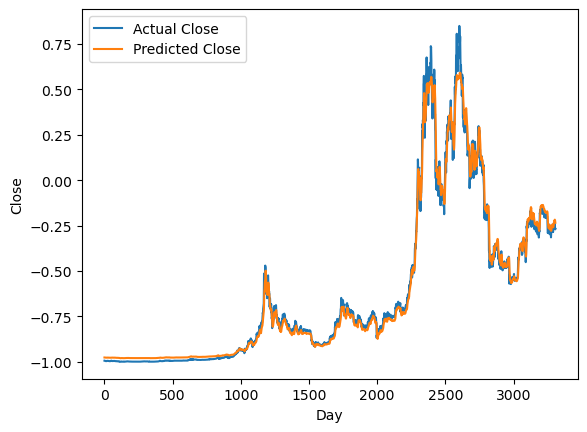

In [56]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()
    
plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [57]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([ 1067.56172398,  1067.56172398,  1066.05818088, ...,
       28540.50549552, 28288.80977319, 28093.34699737])

In [58]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  423.20442264,   411.57369111,   404.42534313, ...,
       26873.32063142, 26756.79930025, 26862.37540256])

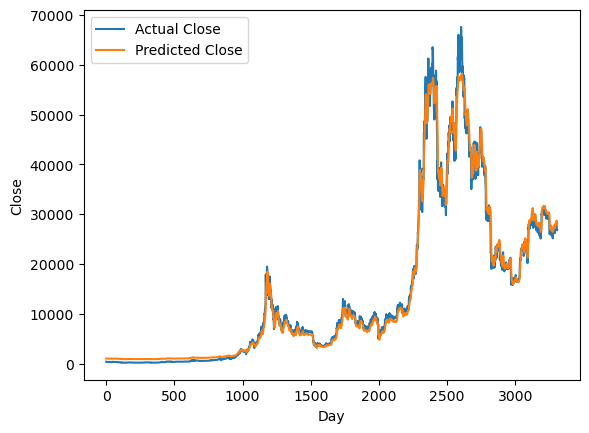

In [59]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [60]:
# Test on the test sets

test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([27964.18895136, 27859.59384574, 27881.28223769, 28351.72501277,
       28624.78973278, 28826.31013601, 29117.12296558, 29633.15981609,
       30056.56472327, 30373.85034061, 31548.75194518, 32553.62634509,
       33455.72830516, 33986.93475399, 34301.18666894, 34606.31004575,
       34959.66874738, 35080.71754666, 35191.16006611, 35478.70888177,
       35528.28234909, 35537.46221845, 35653.34041558, 35700.78730369,
       35735.41931144, 35874.14098881, 35997.60968857, 36410.01151742,
       36867.2407125 , 37127.14943038, 37318.39625613, 37314.99861809,
       37042.53602147, 37552.24256443, 37283.72106497, 37257.70238198,
       37222.71268524, 37437.53167732, 37618.61980977, 37296.10791355,
       37514.25610204, 37635.79621445, 37841.84897448, 37999.79786107,
       37996.14573967, 37951.61087994, 38158.97761062, 38234.11456977,
       38251.9468734 , 38536.04644821, 38936.99869858, 39373.34341926,
       40267.09305618, 41443.00634753, 42216.14798185, 42775.54749338,
      

In [61]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([26861.70728189, 27159.65216381, 28519.46675587, 28415.74781174,
       28328.34187571, 28719.80681257, 29682.94947204, 29918.41203485,
       29993.89663402, 33086.23448936, 33901.5274765 , 34502.82032677,
       34156.64853943, 33909.80076587, 34089.57411289, 34538.48045273,
       34502.36323446, 34667.78122127, 35437.25389538, 34938.24217182,
       34732.3242581 , 35082.19528835, 35049.35552788, 35037.37104547,
       35443.56247542, 35655.27735443, 36693.12499892, 37313.96873453,
       37138.05079684, 37054.51951935, 36502.3554695 , 35537.64065556,
       37880.58204813, 36154.76952736, 36596.68359441, 36585.70312414,
       37386.54687299, 37476.95704349, 35813.81247617, 37432.33982295,
       37289.62110009, 37720.28122741, 37796.79292631, 37479.12110263,
       37254.16799648, 37831.08598504, 37858.49224059, 37712.746062  ,
       38688.75004436, 39476.33204774, 39978.39051019, 41980.09769013,
       44080.64843446, 43746.44524131, 43292.66420071, 44166.60134384,
      

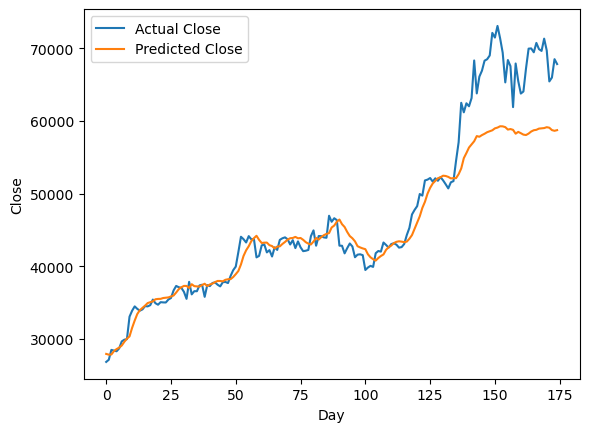

In [62]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [67]:
# Model evaluation

#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()  # Set the model to evaluation mode

mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()  # For Mean Absolute Error

total_mse = 0.0
total_mae = 0.0
total_mape = 0.0  # For MAPE calculation
total_count = 0
ss_tot = 0.0  # Total sum of squares for R-squared
ss_res = 0.0  # Residual sum of squares for R-squared

with torch.no_grad():  # Disable gradient computation
    for inputs, actuals in test_loader:
        inputs, actuals = inputs.to(device), actuals.to(device)

        # Get model predictions
        predictions = model(inputs).detach().cpu().numpy().flatten()

        # Prepare dummy array for inverse transform
        dummies_pred = np.zeros((inputs.shape[0], lookback + 1))
        dummies_pred[:, 0] = predictions
        predictions_reverted = scaler.inverse_transform(dummies_pred)[:, 0]

        # Repeat process for actual values
        actuals_numpy = actuals.cpu().numpy().flatten()  # Ensure actuals are flat
        dummies_actual = np.zeros((actuals.shape[0], lookback + 1))
        dummies_actual[:, 0] = actuals_numpy
        actuals_reverted = scaler.inverse_transform(dummies_actual)[:, 0]

        # Convert reverted data back to tensors
        predictions_reverted = torch.tensor(predictions_reverted).to(device)
        actuals_reverted = torch.tensor(actuals_reverted).to(device)

        # Calculate MSE and MAE
        mse = mse_loss(predictions_reverted, actuals_reverted)
        mae = mae_loss(predictions_reverted, actuals_reverted)
        total_mse += mse.item() * actuals_reverted.size(0)
        total_mae += mae.item() * actuals_reverted.size(0)

        # Calculate MAPE (avoid division by zero)
        mape = torch.mean(torch.abs((actuals_reverted - predictions_reverted) / torch.clamp(actuals_reverted, min=1e-8)))
        total_mape += mape.item() * actuals_reverted.size(0)

        # For R-squared
        total_count += actuals_reverted.size(0)
        ss_tot += torch.sum((actuals_reverted - torch.mean(actuals_reverted))**2)
        ss_res += torch.sum((actuals_reverted - predictions_reverted)**2)

# Calculate average MSE, MAE, MAPE
average_mse = total_mse / total_count
average_mae = total_mae / total_count
average_mape = total_mape / total_count

# Calculate RMSE
rmse = torch.sqrt(torch.tensor(average_mse))

# Calculate R-squared
r_squared = 1 - (ss_res / ss_tot)

print(f'RMSE: {rmse.item()}, MSE: {average_mse}, MAE: {average_mae}, MAPE: {average_mape}%, R^2: {r_squared.item()}')

RMSE: 4595.60400390625, MSE: 21119577.41646612, MAE: 2794.0019546912317, MAPE: 0.0484001323797412%, R^2: -2.0625599078715764
